C:\Users\kodonghwan\AppData\Local\Temp\ipykernel_27160\887977756.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_100s['PM10_Color'] = df_100s['PM10'].apply(get_pm10_grade).map(pm10_colors)
C:\Users\kodonghwan\AppData\Local\Temp\ipykernel_27160\887977756.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_100s['PM2.5_Color'] = df_100s['PM2.5'].apply(get_pm25_grade).map(pm25_colors)


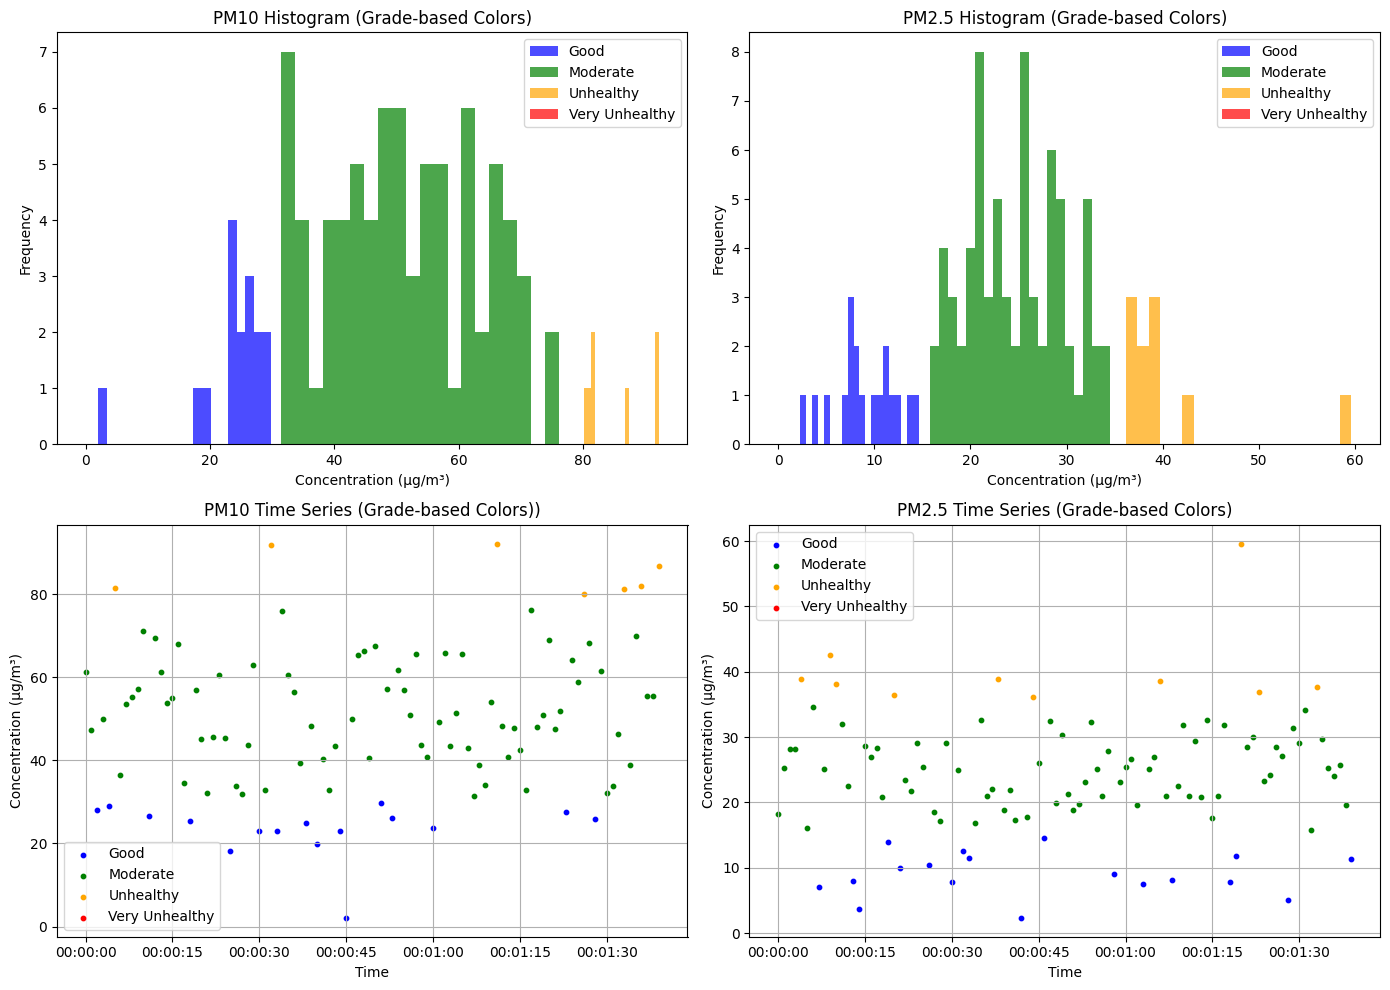

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일에서 데이터 읽기
df = pd.read_csv('dust_data_feb_2024.csv')  # 파일 경로를 정확히 지정하세요
df['Timestamp'] = pd.to_datetime(df['Timestamp'])  # Timestamp를 datetime 형식으로 변환

# 처음 100초 데이터 선택
df_100s = df.head(100)

# 등급별 색상 정의 (영어)
pm10_colors = {
    "Good": "blue",
    "Moderate": "green",
    "Unhealthy": "orange",
    "Very Unhealthy": "red"
}

pm25_colors = {
    "Good": "blue",
    "Moderate": "green",
    "Unhealthy": "orange",
    "Very Unhealthy": "red"
}

# 미세먼지(PM10) 등급 반환 함수 (영어)
def get_pm10_grade(pm10):
    if pm10 <= 30:
        return "Good"
    elif pm10 <= 80:
        return "Moderate"
    elif pm10 <= 150:
        return "Unhealthy"
    else:
        return "Very Unhealthy"

# 초미세먼지(PM2.5) 등급 반환 함수 (영어)
def get_pm25_grade(pm25):
    if pm25 <= 15:
        return "Good"
    elif pm25 <= 35:
        return "Moderate"
    elif pm25 <= 75:
        return "Unhealthy"
    else:
        return "Very Unhealthy"

# 등급에 따른 색상 리스트 생성
df_100s['PM10_Color'] = df_100s['PM10'].apply(get_pm10_grade).map(pm10_colors)
df_100s['PM2.5_Color'] = df_100s['PM2.5'].apply(get_pm25_grade).map(pm25_colors)

# 시각화 함수
def visualize_dust_data(df):
    plt.figure(figsize=(14, 10))
    
    # 히스토그램 (PM10)
    plt.subplot(2, 2, 1)
    for grade, color in pm10_colors.items():
        plt.hist(df[df['PM10_Color'] == color]['PM10'], bins=20, color=color, alpha=0.7, label=grade)
    plt.title('PM10 Histogram (Grade-based Colors)')
    plt.xlabel('Concentration (µg/m³)')
    plt.ylabel('Frequency')
    plt.legend()
    
    # 히스토그램 (PM2.5)
    plt.subplot(2, 2, 2)
    for grade, color in pm25_colors.items():
        plt.hist(df[df['PM2.5_Color'] == color]['PM2.5'], bins=20, color=color, alpha=0.7, label=grade)
    plt.title('PM2.5 Histogram (Grade-based Colors)')
    plt.xlabel('Concentration (µg/m³)')
    plt.ylabel('Frequency')
    plt.legend()
    
    # 꺾은선 그래프 (PM10)
    plt.subplot(2, 2, 3)
    for grade, color in pm10_colors.items():
        plt.scatter(df[df['PM10_Color'] == color]['Timestamp'], df[df['PM10_Color'] == color]['PM10'], color=color, label=grade, s=10)
    plt.title('PM10 Time Series (Grade-based Colors)'
    ')')
    plt.xlabel('Time')
    plt.ylabel('Concentration (µg/m³)')
    plt.legend()
    plt.grid(True)
    
    # 꺾은선 그래프 (PM2.5)
    plt.subplot(2, 2, 4)
    for grade, color in pm25_colors.items():
        plt.scatter(df[df['PM2.5_Color'] == color]['Timestamp'], df[df['PM2.5_Color'] == color]['PM2.5'], color=color, label=grade, s=10)
    plt.title('PM2.5 Time Series (Grade-based Colors)')
    plt.xlabel('Time')
    plt.ylabel('Concentration (µg/m³)')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# 시각화 실행
visualize_dust_data(df_100s)

In [7]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv('dust_data_feb_2024.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])  # Timestamp를 datetime 형식으로 변환

# 오전 데이터 필터링 (00:00:00 ~ 11:59:59)
df_am = df[df['Timestamp'].dt.hour < 12]

# 오후 데이터 필터링 (12:00:00 ~ 23:59:59)
df_pm = df[df['Timestamp'].dt.hour >= 12]

# 오전 데이터 저장
df_am.to_csv('dust_data_feb_2024_am.csv', index=False)

# 오후 데이터 저장
df_pm.to_csv('dust_data_feb_2024_pm.csv', index=False)